In [23]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf; tf.keras
from tensorflow import keras
from keras.api._v2.keras import layers
from keras.api._v2.keras import Sequential
from keras.api._v2.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [24]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Skole\3.g\Programmering\Eksamen\Data\archive\skin-lesions\test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 600 files belonging to 3 classes.


In [26]:
# train dataset belong class name 
train_ds.class_names

['melanoma', 'nevus', 'seborrheic_keratosis']

In [27]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Skole\3.g\Programmering\Eksamen\Data\archive\skin-lesions\valid',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 150 files belonging to 3 classes.


In [28]:
# test dataset belong classe name 
val_ds.class_names

['melanoma', 'nevus', 'seborrheic_keratosis']

In [29]:
# this is tensore form because multidimension data 
val_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
# convert simple form 
# fetch 1 batch , 1 batch have 32 files  
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)

this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [31]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names = orrespond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['melanoma', 'nevus', 'seborrheic_keratosis']
3


(32, 180, 180, 3)
[1 2 1 1 0 1 1 1 2 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 2 1 1 1 1 1 2 1]


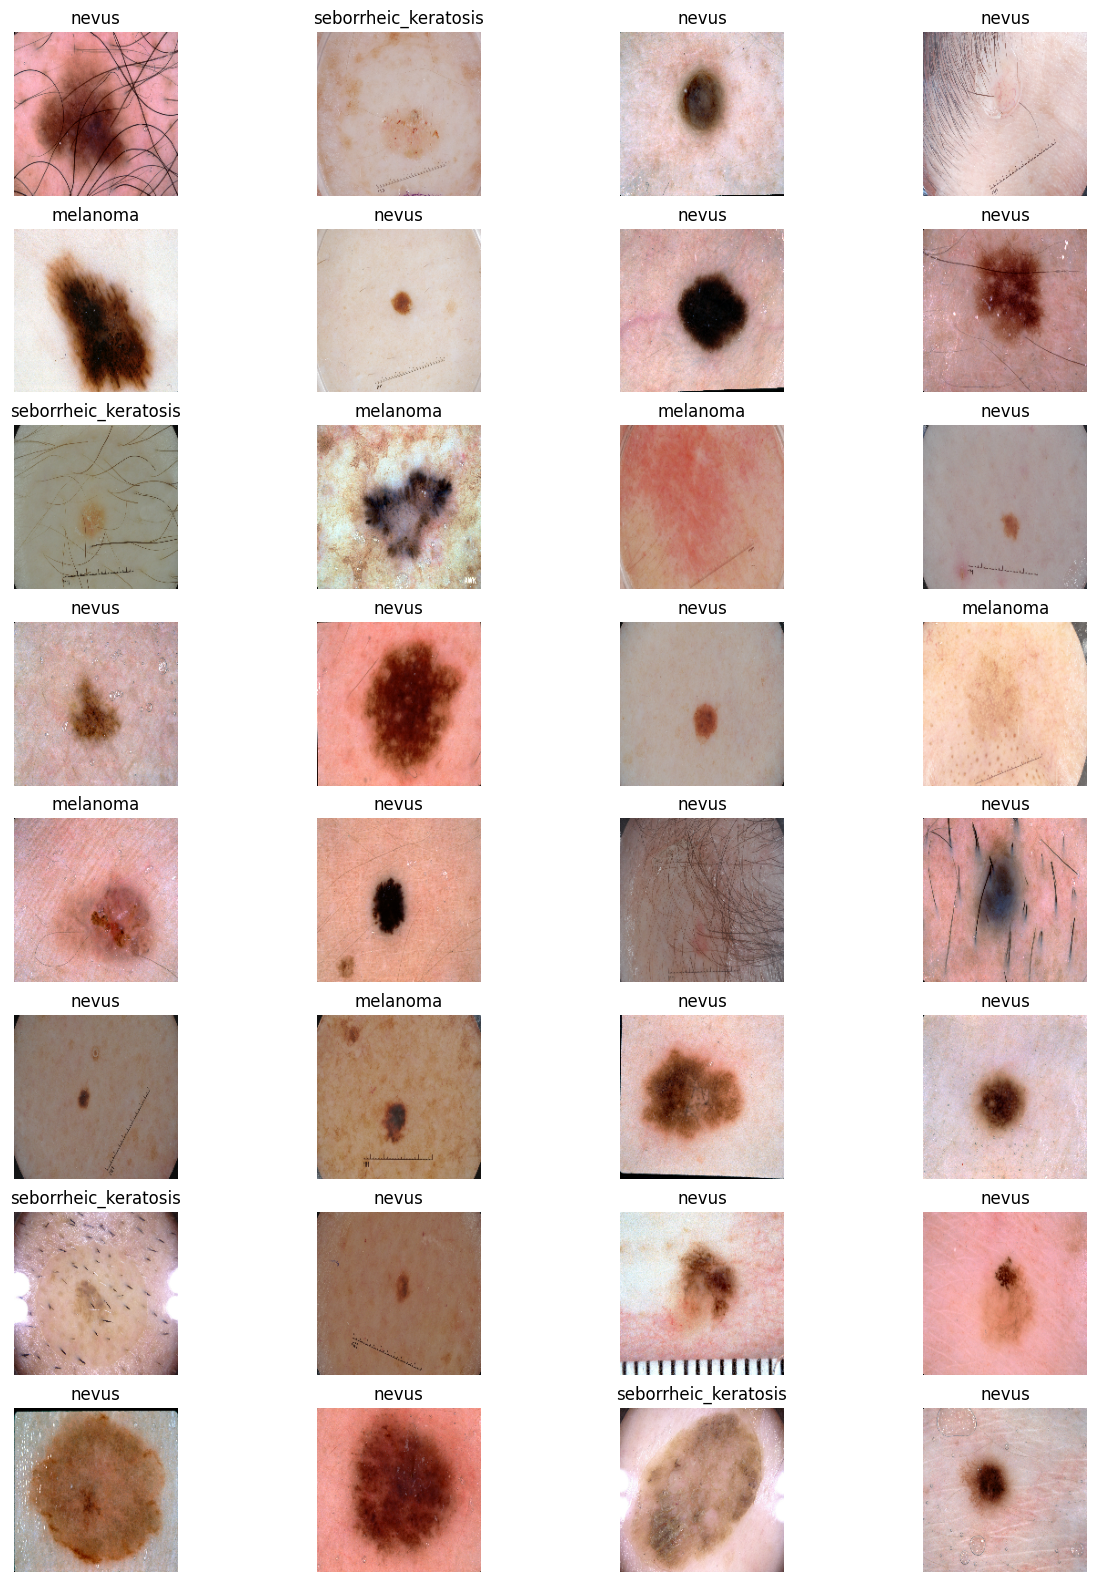

In [32]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [33]:
# incress the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [34]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [35]:

# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])



In [36]:
input_shape = (batch_size , img_height , img_width , channels)

In [37]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))

In [38]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.build(input_shape)

In [40]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 180, 180, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (32, 90, 90, 64)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 90, 90, 64)          36928     
                                                      

In [41]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
19/19 [==============================] - 66s 2s/step - loss: 1.1689 - accuracy: 0.6150 - val_loss: 1.0564 - val_accuracy: 0.5200
Epoch 2/5
19/19 [==============================] - 32s 2s/step - loss: 0.8875 - accuracy: 0.6550 - val_loss: 1.0316 - val_accuracy: 0.5200
Epoch 3/5
19/19 [==============================] - 33s 2s/step - loss: 0.8845 - accuracy: 0.6550 - val_loss: 1.0581 - val_accuracy: 0.5200
Epoch 4/5
19/19 [==============================] - 40s 2s/step - loss: 0.8652 - accuracy: 0.6550 - val_loss: 1.0487 - val_accuracy: 0.5200
Epoch 5/5
19/19 [==============================] - 44s 2s/step - loss: 0.8243 - accuracy: 0.6517 - val_loss: 1.0691 - val_accuracy: 0.5200


In [42]:
# accuracy of model each epochs
history.history['accuracy']

[0.6150000095367432,
 0.6549999713897705,
 0.6549999713897705,
 0.6549999713897705,
 0.6516666412353516]

In [43]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.5199999809265137,
 0.5199999809265137,
 0.5199999809265137,
 0.5199999809265137,
 0.5199999809265137]

In [44]:
# lost
history.history['loss']

[1.1689308881759644,
 0.887508749961853,
 0.884539008140564,
 0.8651883006095886,
 0.8243383765220642]

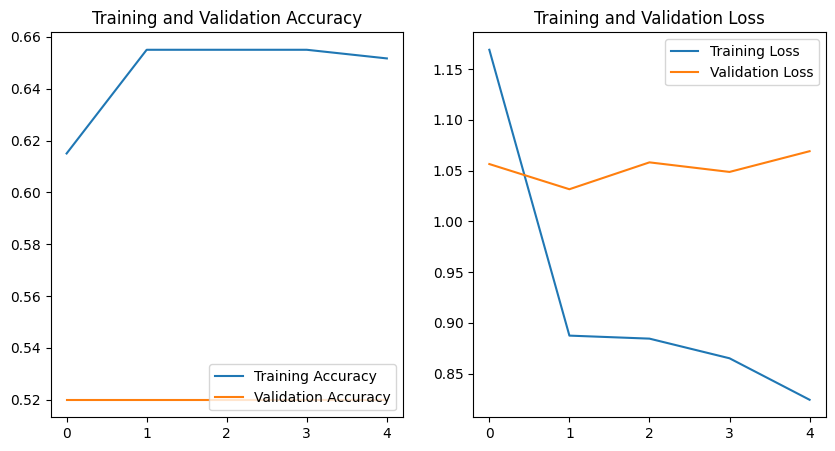

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)



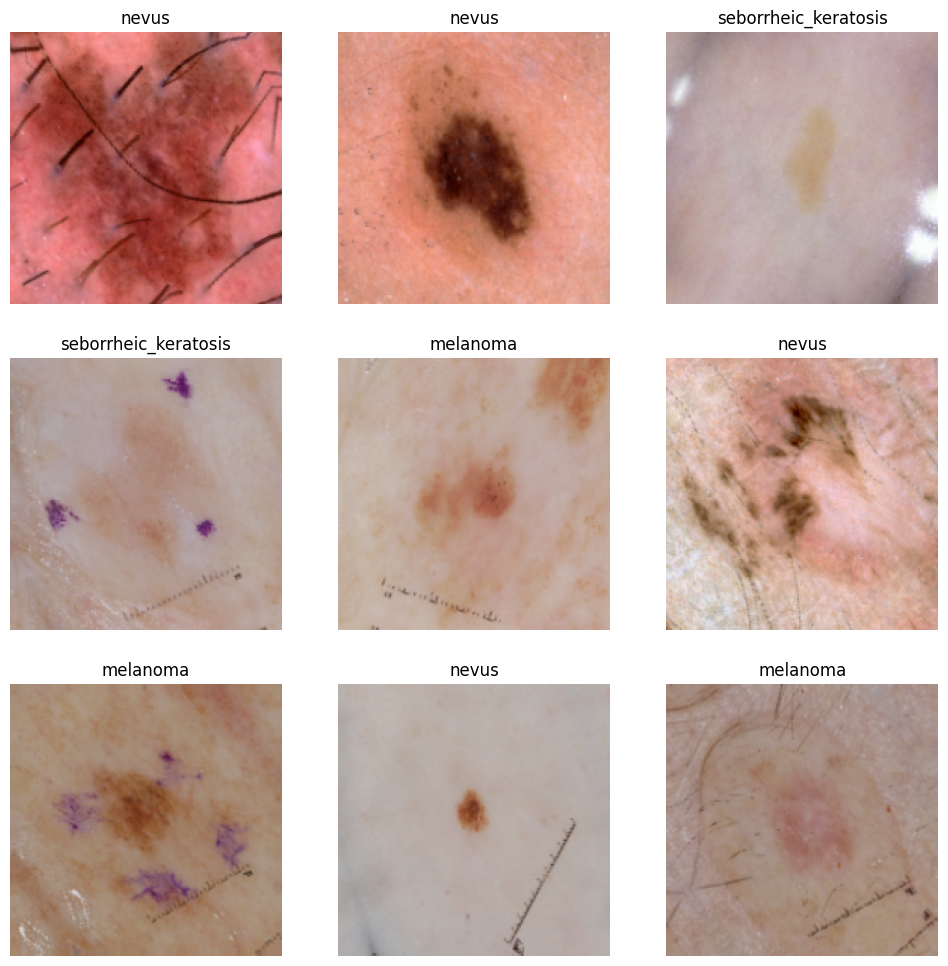

In [47]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


19/19 [==============================] - 7s 355ms/step - loss: 0.7960 - accuracy: 0.6550 - val_loss: 0.9355 - val_accuracy: 0.5200
Epoch 2/20
19/19 [==============================] - 8s 416ms/step - loss: 0.7819 - accuracy: 0.6467 - val_loss: 0.9953 - val_accuracy: 0.5133
Epoch 3/20
19/19 [==============================] - 7s 394ms/step - loss: 0.7646 - accuracy: 0.6550 - val_loss: 1.0130 - val_accuracy: 0.5200
Epoch 4/20
19/19 [==============================] - 8s 395ms/step - loss: 0.7617 - accuracy: 0.6617 - val_loss: 1.0132 - val_accuracy: 0.5067
Epoch 5/20
19/19 [==============================] - 8s 409ms/step - loss: 0.7356 - accuracy: 0.6617 - val_loss: 0.9721 - val_accuracy: 0.5867
Epoch 6/20
19/19 [==============================] - 8s 436ms/step - loss: 0.7584 - accuracy: 0.6633 - val_loss: 0.9289 - val_accuracy: 0.5933
Epoch 7/20
19/19 [==============================] - 8s 413ms/step - loss: 0.7404 - accuracy: 0.6767 - val_loss: 0.8993 - val_accuracy: 0.6000
Epoch 8/20
19/19 

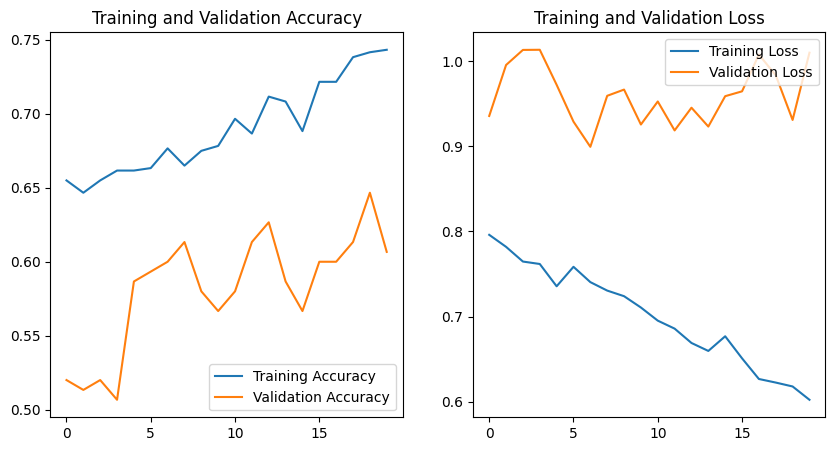

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
class_names

['melanoma', 'nevus', 'seborrheic_keratosis']

In [54]:
data_dir_train = pathlib.Path(r"C:\Skole\3.g\Programmering\Eksamen\Data\archive\skin-lesions\train")

In [55]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2000


In [56]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))

In [57]:
count

[374, 1372, 254]

<BarContainer object of 3 artists>

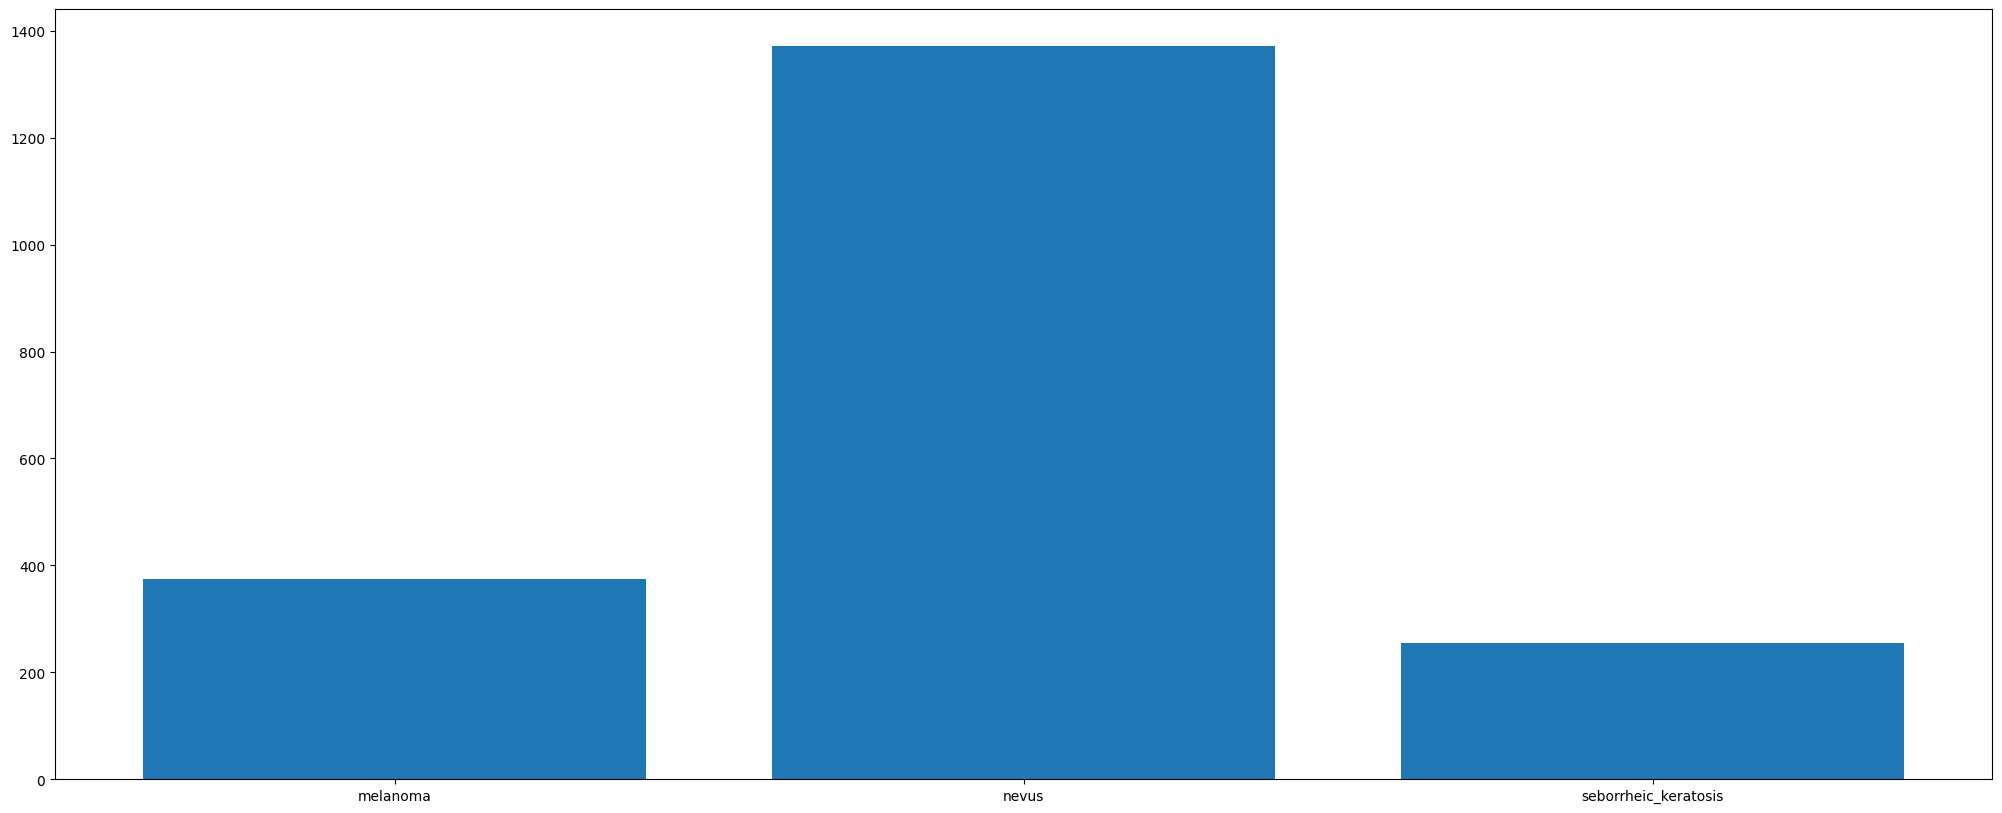

In [58]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [59]:
batch_size = 32
img_height = 180
img_width = 180

In [60]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 3 classes.
Using 1600 files for training.


In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 3 classes.
Using 400 files for validation.


In [62]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


50/50 [==============================] - 16s 323ms/step - loss: 0.2106 - accuracy: 0.9156 - val_loss: 1.4230 - val_accuracy: 0.6450
Epoch 2/20
50/50 [==============================] - 17s 337ms/step - loss: 0.2008 - accuracy: 0.9244 - val_loss: 1.4343 - val_accuracy: 0.6375
Epoch 3/20
50/50 [==============================] - 17s 341ms/step - loss: 0.1644 - accuracy: 0.9431 - val_loss: 1.6539 - val_accuracy: 0.6675
Epoch 4/20
50/50 [==============================] - 17s 347ms/step - loss: 0.1124 - accuracy: 0.9613 - val_loss: 1.9754 - val_accuracy: 0.6550
Epoch 5/20
50/50 [==============================] - 18s 358ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 1.9883 - val_accuracy: 0.6275
Epoch 6/20
50/50 [==============================] - 17s 345ms/step - loss: 0.0632 - accuracy: 0.9787 - val_loss: 2.3517 - val_accuracy: 0.6325
Epoch 7/20
50/50 [==============================] - 18s 360ms/step - loss: 0.0794 - accuracy: 0.9769 - val_loss: 2.2511 - val_accuracy: 0.6375
Epoch 8/20

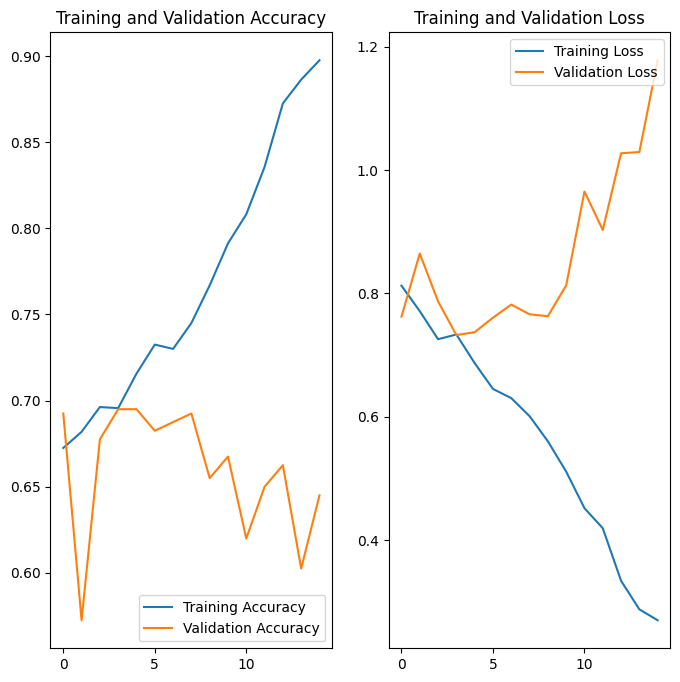

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()